# Imports

In [1]:
import pandas as pd
import gtfs_kit as gk
import helper #homemade function file helper.py
import warnings
import numpy as np
import seaborn as sns
import dataframe_image as dfi
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# GTFS Static - Statistics 

## Initial Load GTFS

In [2]:
# Load the gtfs we generated with the various csv file created in the preprocessing
feed = gk.feed.read_feed('../processed_files/preprocessing_gtfs_static.zip',dist_units="km")
routes = gk.routes.get_routes(feed)
stop_times = feed.get_stop_times()
trips = feed.get_trips()
stops = feed.get_stops()
shapes = feed.shapes
calendar_dates = feed.calendar_dates
calendar = feed.calendar

## Basic summary stats


In [3]:
# Stop_Times
stop_times_analytics = stop_times.copy()

Mean of stop_sequence : 8.228435407084644
--------------------------------------------------
Median of stop_sequence : 6.0
--------------------------------------------------
Standard Deviation of stop_sequence : 6.3353424422645634
--------------------------------------------------
Skewness of stop_sequence : 0.8388008533063621


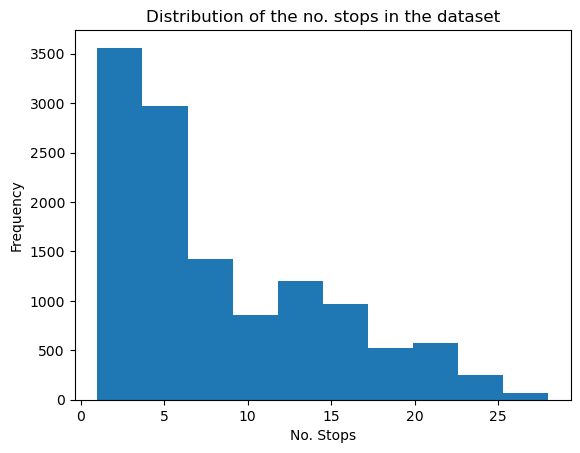

In [4]:
# Basic statistics on the number of stops and
# Distribution of number of stops in the dataset
helper.stop_sequence_statistics(stop_times_analytics)

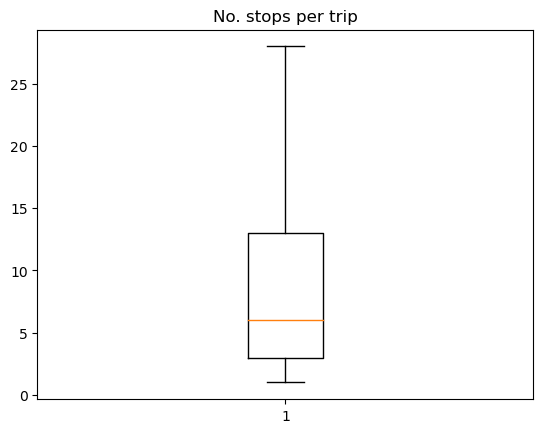

In [5]:
# Number of stops per trip
helper.boxplot_stop_sequence(stop_times_analytics)

For each value:
    last_stop_sequence  value
0                    1      0
1                    2      0
2                    3      6
3                    4     16
4                    5    579
5                    6     93
6                    7     24
7                    8     48
8                    9      8
9                   10      0
10                  11      6
11                  12      6
12                  13     53
13                  14     14
14                  15     31
15                  16     13
16                  17     21
17                  18     39
18                  19      6
19                  20     56
20                  21     27
21                  22     47
22                  23     26
23                  24     25
24                  25     17
25                  26     24
26                  27      8
27                  28      8
28                  29      0
--------------------------------------------------


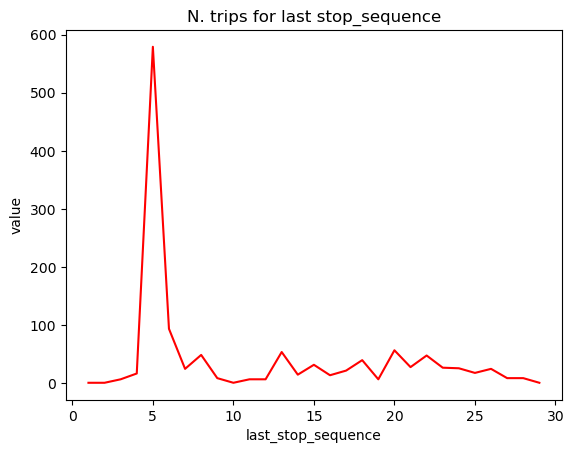

In [6]:
# Analytics on number of stop per trip
result = helper.plot_number_stops(stop_times_analytics)


In [7]:
# Analytics on number of stop per trip aggregated
helper.aggregated_number_stops(result,3)

   last_stop_sequence  value
0              (0, 3]      6
1              (3, 6]    688
2              (6, 9]     80
3             (9, 12]     12
4            (12, 15]     98
5            (15, 18]     73
6            (18, 21]     89
7            (21, 24]     98
8            (24, 27]     49
9            (27, 30]      8
10           (30, 33]      0


In [8]:
# For more precision of calculations we don't consider in the analysis the start stop 
# where speed, time , distance are all equal to 0

stop_times_analytics.drop(stop_times_analytics[(stop_times_analytics['time_diff'] == 0) & 
                              (stop_times_analytics['dist_diff'] == 0) &
                              (stop_times_analytics['speed'] == 0)].index, inplace=True)

Mean of time difference : 0.09473426074549668
--------------------------------------------------
Median of time difference : 0.0833333333333333
--------------------------------------------------
Standard Deviation of time difference : 0.04212796728924864
--------------------------------------------------
Skewness of time difference : 1.3385846988863477
--------------------------------------------------


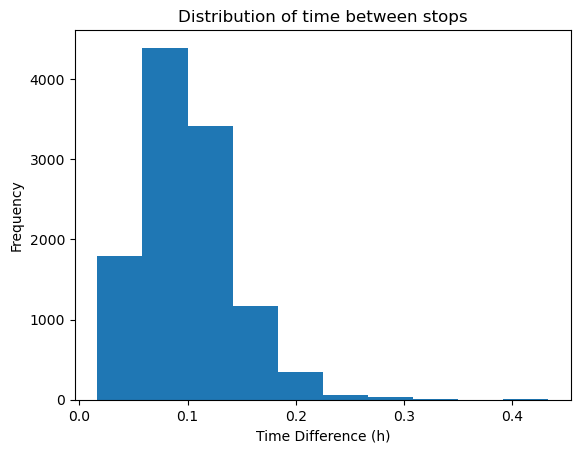

In [9]:
# Basic statistics for time
helper.time_statistics(stop_times_analytics)

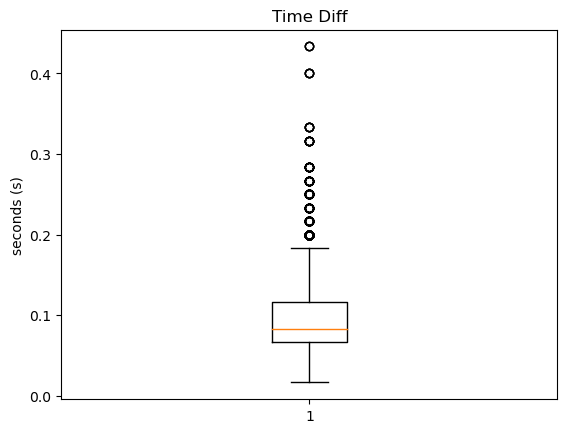

In [10]:
# Box plot on time difference
helper.boxplot_time(stop_times_analytics)

Mean of distance difference : 4.961020172106296
--------------------------------------------------
Median of distance difference : 4.1336200000000005
--------------------------------------------------
Standard Deviation of distance difference : 2.4172609561489606
--------------------------------------------------
Skewness of distance difference : 1.3576810939015813
--------------------------------------------------


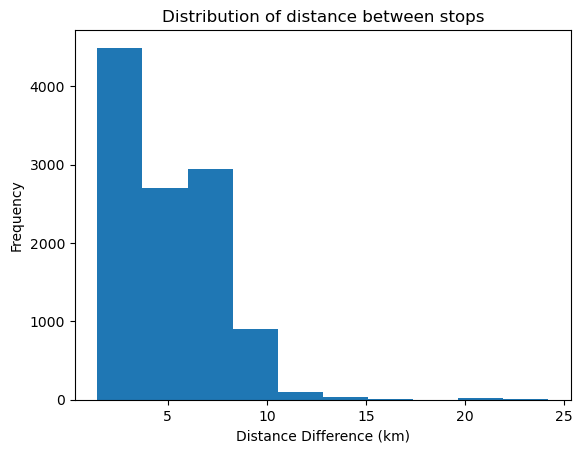

In [11]:
# Basic statistics for distance
helper.distance_statistics(stop_times_analytics)

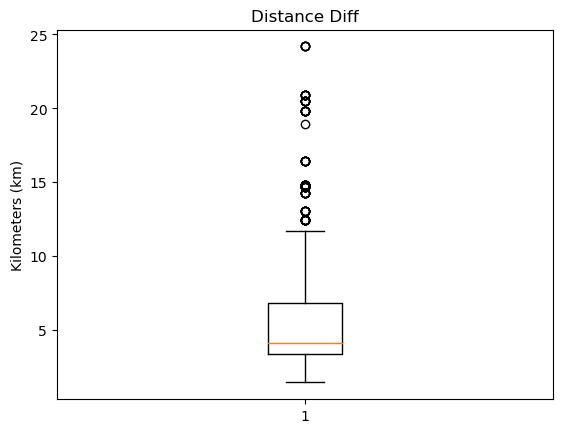

In [12]:
# Box plot on distance difference
helper.boxplot_distance(stop_times_analytics)

Mean of speed : 53.59938025430434
--------------------------------------------------
Median of speed : 52.59824999999985
--------------------------------------------------
Standard Deviation of speed : 14.789070155097447
--------------------------------------------------
Skewness of speed : 0.0006966124362007481
--------------------------------------------------


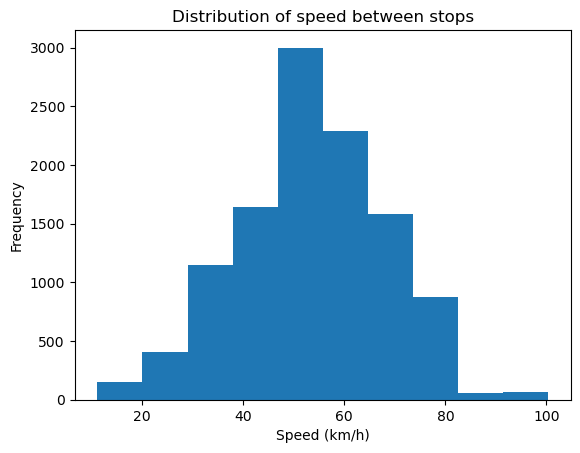

In [13]:
# Basic statistics for speed
helper.speed_statistics(stop_times_analytics)

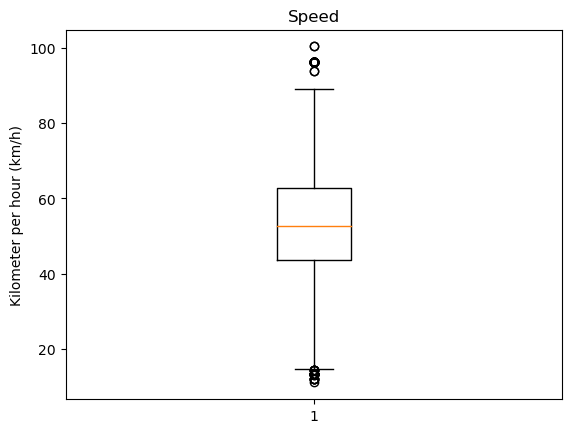

In [14]:
# Number of speed per trip
helper.boxplot_speed(stop_times_analytics)

In [15]:
df_analytics_pisa_lucca_aulla = helper.dataset_for_scatter(stop_times)

In [16]:
df_analytics_pisa_lucca_aulla.head()

,time,distance,speed
0,0.466667,23.13283,50.435526
1,0.466667,23.13283,50.435526
2,0.400000,23.13283,56.967012
3,0.466667,23.13283,50.435526
4,0.516667,23.13283,48.985296


/Users/gianlucarea/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


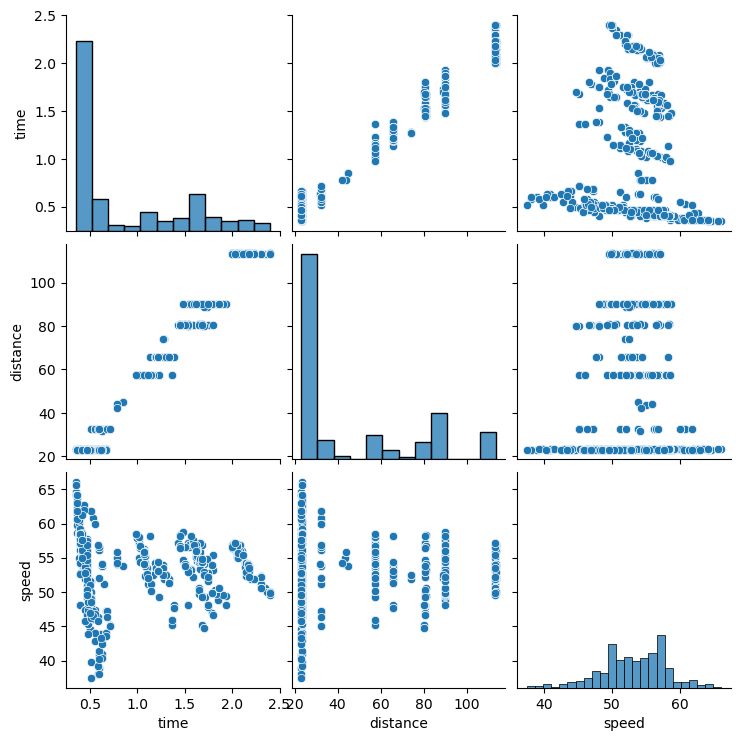

In [17]:
helper.correlogram_time_distance_speed(df_analytics_pisa_lucca_aulla)

In [18]:
main_dataset = pd.read_csv("../processed_files/main_dataset.csv", index_col=[0])

In [19]:
print(main_dataset.head(0))

Empty DataFrame
Columns: [trip_id, arrival_time, departure_time, codice_stazione, stop_sequence, shape_dist_traveled, time_diff, speed, dist_diff, codice, direction_id, data_giorno, stop_lat, stop_lon, stop_code, ritardo_arrivo, ritardo_partenza, orario_arrivo, orario_partenza, orario, location_id, time, temperature, humidity, app_temp, precipitation, rain, snow_fall, snow_depth, wmo_code, wind_speed_10m, wind_speed_100m, wind_dir_10m, wind_dir_100m, wind_gusts, soil_temperature, temperature_linea, app_temp_linea, rain_linea, snow_fall_linea, snow_depth_linea, humidity_linea, precipitation_linea, wmo_code_linea, wind_speed_10m_linea, wind_speed_100m_linea, wind_dir_10m_linea, wind_dir_100m_linea, wind_gusts_linea, soil_temperature_linea]
Index: []

[0 rows x 50 columns]


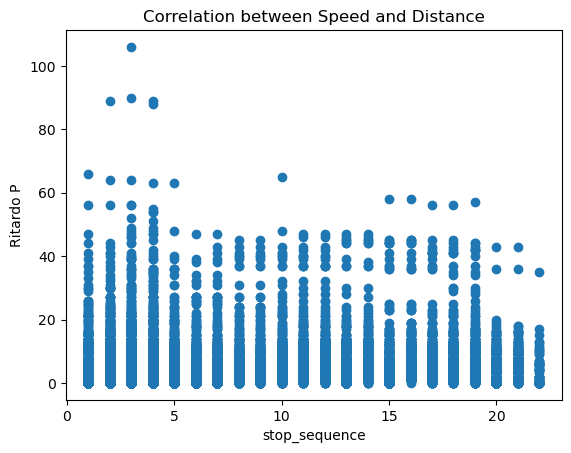

In [20]:
plt.scatter(main_dataset['stop_sequence'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('stop_sequence')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()

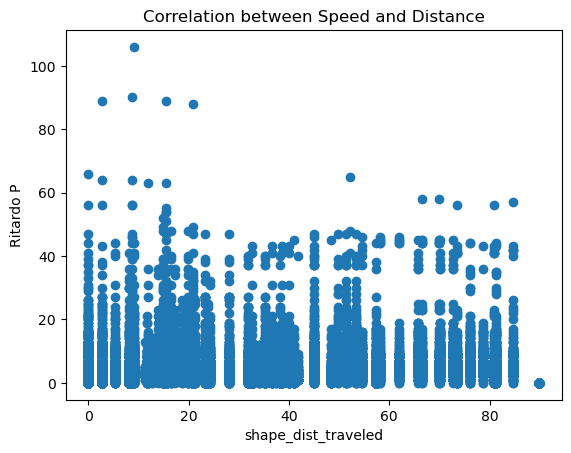

In [21]:
plt.scatter(main_dataset['shape_dist_traveled'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('shape_dist_traveled')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()

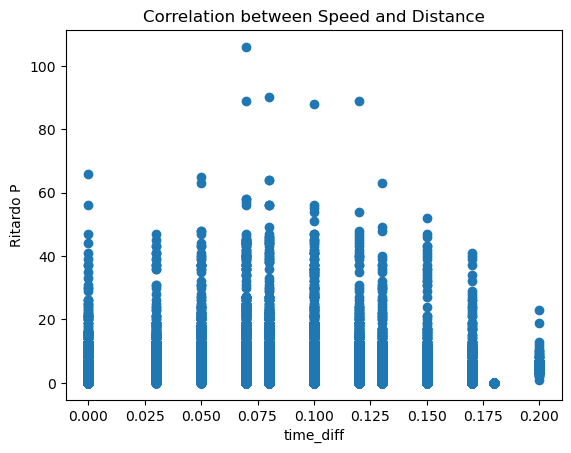

In [22]:
plt.scatter(main_dataset['time_diff'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('time_diff')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()

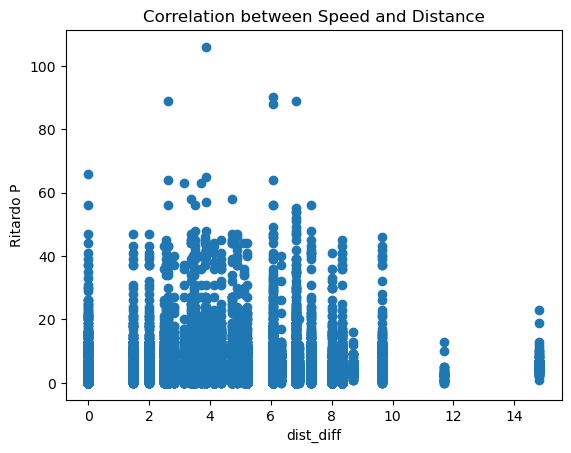

In [23]:
plt.scatter(main_dataset['dist_diff'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('dist_diff')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()

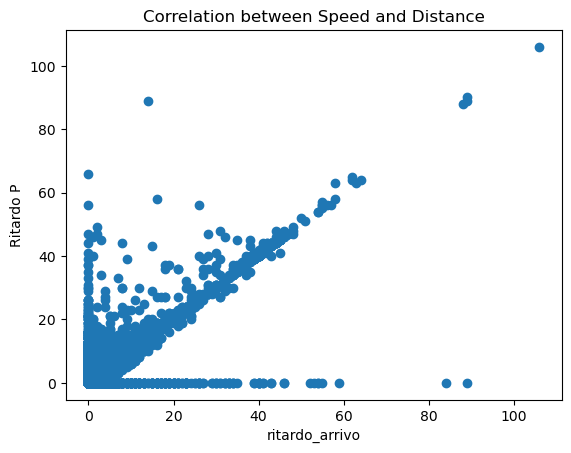

In [24]:
plt.scatter(main_dataset['ritardo_arrivo'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('ritardo_arrivo')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()

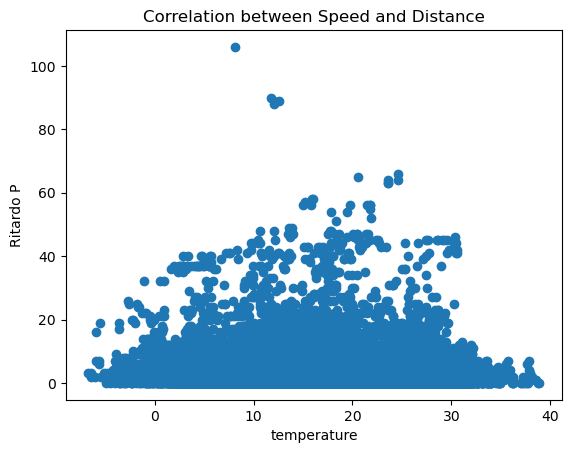

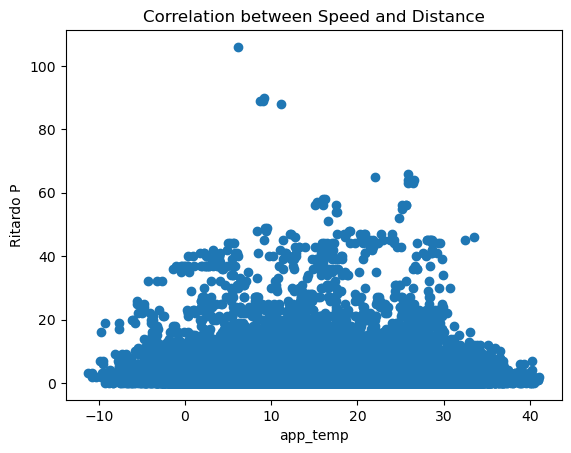

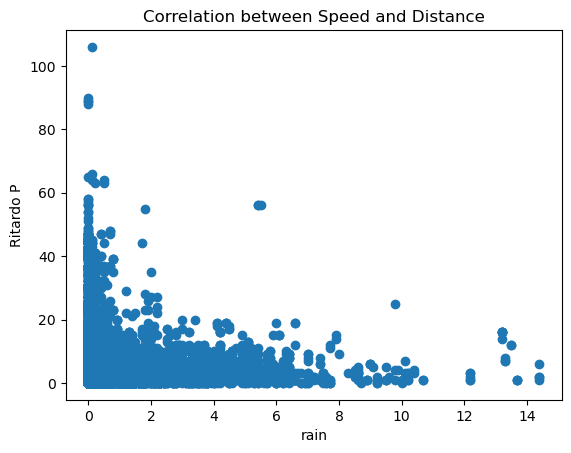

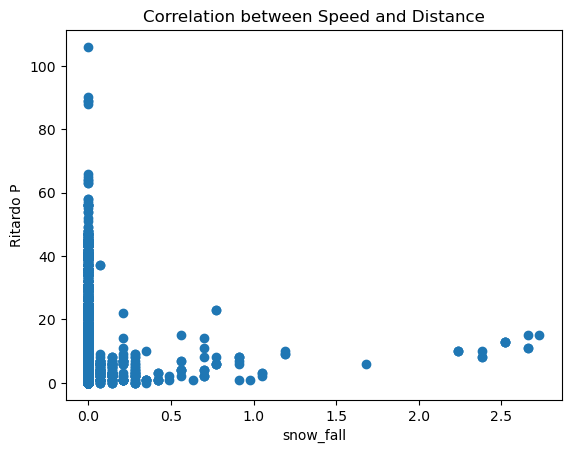

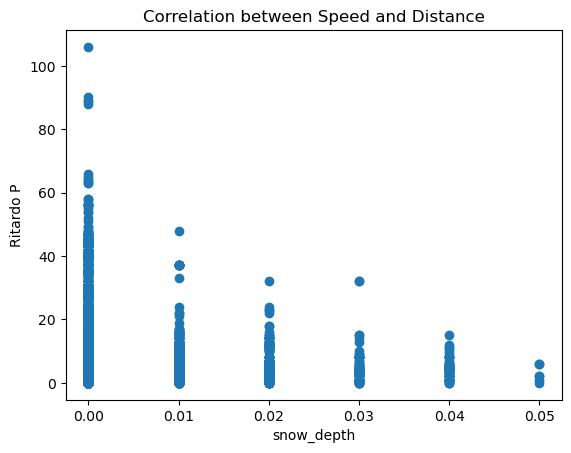

KeyError: 'wind_speed_10'

In [25]:
plt.scatter(main_dataset['temperature'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('temperature')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(main_dataset['app_temp'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('app_temp')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(main_dataset['rain'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('rain')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(main_dataset['snow_fall'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('snow_fall')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(main_dataset['snow_depth'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('snow_depth')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(main_dataset['wind_speed_10'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('wind_speed10')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()

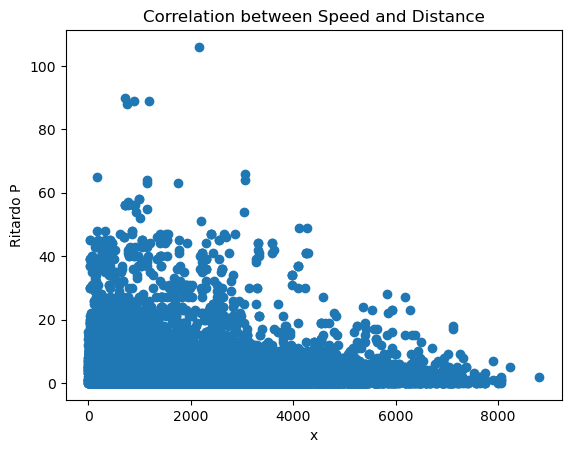

In [40]:
plt.scatter(x.value,main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('x')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()

In [ ]:
plt.scatter(x.value,main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('x')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()

In [38]:
x['value'] = main_dataset.wind_speed_10m * main_dataset.wind_dir_10m

In [39]:
x

0                                                   1182.6
1                                                   1182.6
2                                                    905.2
3                                                   1239.3
4                                                   1239.3
                               ...                        
49996                                               5427.2
49997                                               5427.2
49998                                               4029.6
49999                                               4029.6
value    0         597.6
1         597.6
2         368....
Length: 49983, dtype: object

In [26]:
print(main_dataset.head(0))

Empty DataFrame
Columns: [trip_id, arrival_time, departure_time, codice_stazione, stop_sequence, shape_dist_traveled, time_diff, speed, dist_diff, codice, direction_id, data_giorno, stop_lat, stop_lon, stop_code, ritardo_arrivo, ritardo_partenza, orario_arrivo, orario_partenza, orario, location_id, time, temperature, humidity, app_temp, precipitation, rain, snow_fall, snow_depth, wmo_code, wind_speed_10m, wind_speed_100m, wind_dir_10m, wind_dir_100m, wind_gusts, soil_temperature, temperature_linea, app_temp_linea, rain_linea, snow_fall_linea, snow_depth_linea, humidity_linea, precipitation_linea, wmo_code_linea, wind_speed_10m_linea, wind_speed_100m_linea, wind_dir_10m_linea, wind_dir_100m_linea, wind_gusts_linea, soil_temperature_linea]
Index: []

[0 rows x 50 columns]


In [ ]:
plt.scatter(main_dataset['temperature_linea'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('temperature')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(main_dataset['app_temp_linea'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('app_temp')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(main_dataset['rain_linea'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('rain')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(main_dataset['snow_fall_linea'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('snow_fall')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(main_dataset['snow_depth_linea'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('snow_depth')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(main_dataset['wind_speed_linea'],main_dataset['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('wind_speed')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()

In [ ]:
main_dataset = main_dataset.loc[(main_dataset.ritardo_partenza < 100) ]

In [ ]:

normale = main_dataset.loc[(main_dataset.temperature < 3) |
                               (main_dataset.temperature > 30) ]

linea = main_dataset.loc[ (main_dataset.temperature_linea < 3) |
                               (main_dataset.temperature_linea > 30) ]


In [ ]:
normale.temperature

In [ ]:
normale = main_dataset.loc[(main_dataset.rain > 5)]

linea = main_dataset.loc[(main_dataset.rain_linea > 5)]

In [ ]:
normale = main_dataset.loc[ (main_dataset.snow_depth > 0) |
                                (main_dataset.snow_fall > 0)]

linea = main_dataset.loc[(main_dataset.snow_depth_linea > 0) |
                                (main_dataset.snow_fall_linea > 0)]

In [ ]:
normale = main_dataset.loc[(main_dataset.wind_speed > 30) ]

linea = main_dataset.loc[main_dataset.wind_speed_linea > 30]

In [ ]:
plt.scatter(normale['temperature'],normale['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('temperature')
z = np.polyfit(normale['temperature'], normale['ritardo_partenza'], 1)
p = np.poly1d(z)
plt.plot(normale['temperature'],p(normale['temperature']),"r--")
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(normale['app_temp'],normale['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('app_temp')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(normale['rain'],normale['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('rain')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(normale['snow_fall'],normale['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('snow_fall')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(normale['snow_depth'],normale['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('snow_depth')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(normale['wind_speed'],normale['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('wind_speed')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()

# Linea

In [ ]:
plt.scatter(linea['temperature_linea'],linea['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('temperature')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(linea['app_temp_linea'],linea['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('app_temp')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(linea['rain_linea'],linea['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('rain')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(linea['snow_fall_linea'],linea['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('snow_fall')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(linea['snow_depth_linea'],linea['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('snow_depth')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()
plt.scatter(linea['wind_speed_linea'],linea['ritardo_partenza'] )
plt.title('Correlation between Speed and Distance')
plt.ylabel('Ritardo P')
plt.xlabel('wind_speed')
#plt.savefig('scatter_speed_distance_plot.png')
plt.show()

## Saving Dataset 

In [ ]:
### Save the preprocessed data as a zip - equal to gtfs.
result = gk.feed.read_feed('../../feed_collection/20161210.gtfs',dist_units="km")
result.routes = routes
result.trips = trips
result.stops = stops
result.stop_times = stop_times
result.calendar_dates = calendar_dates
result.calendar = calendar
result.shapes = shapes
result.write('../processed_files/gtfs_static_da.zip', 9)

## 52 Weeks Analytics

### Tables creation to Analyze Time, Distance and Speed

## The most wonderfull time of the year

In [ ]:
## Sorting our stop table in order of real-life stop sequence
stops = stops.assign(order=0)
stops.loc[stops.stop_id == 'S06500_1', 'order'] = 0 #Pisa Centrale
stops.loc[stops.stop_id == 'S06501_1', 'order'] = 1 #Pisa San Rosone
stops.loc[stops.stop_id == 'S06400_1', 'order'] = 2 #San Giuliano Terme
stops.loc[stops.stop_id == 'S06401_1', 'order'] = 3 #Rigoli
stops.loc[stops.stop_id == 'S06402_1', 'order'] = 4 #Ripafratta
stops.loc[stops.stop_id == 'S06404_1', 'order'] = 5 #Lucca
stops.loc[stops.stop_id == 'S06313_1', 'order'] = 6 #S.Pietro A Vico	
stops.loc[stops.stop_id == 'S06312_1', 'order'] = 7 #Ponte a Moriano
stops.loc[stops.stop_id == 'S06310_1', 'order'] = 8 #Decimo
stops.loc[stops.stop_id == 'S06309_1', 'order'] = 9 #Borgo a Mozzano
stops.loc[stops.stop_id == 'S06308_1', 'order'] = 10 #Bagni di Lucca
stops.loc[stops.stop_id == 'S06306_1', 'order'] = 11 #Ghivizzano-Cor
stops.loc[stops.stop_id == 'S06304_1', 'order'] = 12 #Fornaci di Barga
stops.loc[stops.stop_id == 'S06303_1', 'order'] = 13 #Barga-Galligano
stops.loc[stops.stop_id == 'S06302_1', 'order'] = 14 #Castelvecchio P
stops.loc[stops.stop_id == 'S06301_1', 'order'] = 15 #Fosciandora-Ces.	
stops.loc[stops.stop_id == 'S06300_1', 'order'] = 16 #Castelnuovo Gar.
stops.loc[stops.stop_id == 'S06322_1', 'order'] = 17 #Villetta San R.
stops.loc[stops.stop_id == 'S06323_1', 'order'] = 18 #Poggio-Car.-Vag.	
stops.loc[stops.stop_id == 'S06324_1', 'order'] = 19 #Camporiggiano
stops.loc[stops.stop_id == 'S06325_1', 'order'] = 20 #Piazza al Serchio
stops.loc[stops.stop_id == 'S06227_1', 'order'] = 21 #Minucciano P. C.	
stops.loc[stops.stop_id == 'S06226_1', 'order'] = 22 #Equi Terme
stops.loc[stops.stop_id == 'S06225_1', 'order'] = 23 #Monzone
stops.loc[stops.stop_id == 'S06224_1', 'order'] = 24 #Gragnola
stops.loc[stops.stop_id == 'S06223_1', 'order'] = 25 #Fivizzano-Gass.
stops.loc[stops.stop_id == 'S06222_1', 'order'] = 26 #F.Rometta-Solie.
stops.loc[stops.stop_id == 'S06013_1', 'order'] = 27
stops = stops.sort_values(by=['order'],ignore_index=True)


In [ ]:
stops

In [ ]:
avgtime_between_stops = pd.DataFrame(0, index=stops['stop_id'].to_list(), columns=stops['stop_id'].to_list())
distance_between_stops = pd.DataFrame(0, index=stops['stop_id'].to_list(), columns=stops['stop_id'].to_list())
avgvelocity_between_stops = pd.DataFrame(0, index=stops['stop_id'].to_list(), columns=stops['stop_id'].to_list())
stop_times = stop_times.drop(columns=['time_diff', 'speed','dist_diff'])


In [ ]:
# We create an empty column for time different, speed, distance 
stop_times = stop_times.assign(time=None)
stop_times = stop_times.assign(speed=None)
stop_times = stop_times.assign(dist=None)

In [ ]:
stop_ids = stops['stop_id'].to_list()
for stop_id in stop_ids:
    ## Secondary list for calculation 
    secondary_stop_ids = stops['stop_id'].to_list()
    secondary_stop_ids.remove(stop_id)
    for secondary_stop_id in secondary_stop_ids:
        ## I take in all the stop_times were there are those 2 stops
        stop_times_with_stops = stop_times.loc[(stop_times['stop_id'] == stop_id) | (stop_times['stop_id'] == secondary_stop_id)]

        ## Delete all the entries with only one of the two stop_ids
        trip_ids_count = stop_times_with_stops.groupby("trip_id").count().reset_index()
        trip_ids_to_del = trip_ids_count.loc[(trip_ids_count.stop_id < 2)].trip_id.to_list()
        stop_times_with_stops = stop_times_with_stops[~stop_times_with_stops.trip_id.isin(trip_ids_to_del)]

        ## Delete stop_times where stop_sequence of stop_id is < of stop_sequence of secondary_stop 
        ## (ONLY ONE WAY because the reverse will be done automatically)        
        stop_times_with_stops.loc[stop_times_with_stops.stop_id == stop_id, 'sort_value'] = 1
        stop_times_with_stops['sort_value'] = stop_times_with_stops['sort_value'].fillna(0)
        stop_times_with_stops['value_diff'] = stop_times_with_stops.sort_values(['trip_id','sort_value'],ascending=False).groupby('trip_id')['stop_sequence'].diff()

        ### Negative values means that secondary_stop happens before stop_id 
        trip_ids_to_del = stop_times_with_stops.loc[(stop_times_with_stops.value_diff < 0)].trip_id.to_list()
        stop_times_with_stops = stop_times_with_stops[~stop_times_with_stops.trip_id.isin(trip_ids_to_del)]

        # Calculating Distance, Time and avg Speed between last stop and current stop
        stop_times_with_stops = stop_times_with_stops.reset_index()
        stop_times_with_stops = stop_times_with_stops.drop(columns=['index'])
        for index, row  in stop_times_with_stops.iterrows():
            if row['stop_id'] == stop_id:
                stop_times_with_stops['time'][index] = 0
                stop_times_with_stops['dist'][index] = 0
                stop_times_with_stops['speed'][index] = 0
            else:
                time = helper.get_sec(row['arrival_time']) - helper.get_sec(stop_times_with_stops.loc[index - 1,'departure_time'])
                distance = row['shape_dist_traveled'] - stop_times_with_stops.loc[index-1,'shape_dist_traveled']
                time_in_hours = time/3600
                stop_times_with_stops['time'][index] = time_in_hours
                stop_times_with_stops['dist'][index] = distance
                stop_times_with_stops['speed'][index] = (distance / time_in_hours) # Speed in km/h
        if(stop_times_with_stops.shape[0] != 0):
            mean_time = round((stop_times_with_stops['time'].sum()) / (stop_times_with_stops.shape[0] / 2), 2) 
            avg_speed = round((stop_times_with_stops['speed'].sum()) / (stop_times_with_stops.shape[0] / 2), 2) 
            avgtime_between_stops.at[stop_id, secondary_stop_id ] = mean_time
            avgvelocity_between_stops.at[stop_id, secondary_stop_id ] = avg_speed
            distance_between_stops.at[stop_id, secondary_stop_id] = round(distance, 2) 

        #stop_times_with_stops.to_csv(str(stop_id) + "_" + str(secondary_stop_id) + ".csv") 

In [ ]:
blue = sns.light_palette('#1E90FF', as_cmap=True)
red = sns.light_palette('#8A2BE2', as_cmap= True)
green = sns.light_palette('seagreen', as_cmap= True)
#avgtime_between_stops.apply(pd.to_numeric).style.background_gradient(cmap=blue)


In [ ]:
df_styled = avgtime_between_stops.style.background_gradient(cmap=blue) #adding a gradient based on values in cell
dfi.export(df_styled,"avgtime_between_stops.png")
avgtime_between_stops.to_csv('../csv/time_matrix.csv')

df_styled = avgvelocity_between_stops.style.background_gradient(cmap=red) #adding a gradient based on values in cell
dfi.export(df_styled,"avgvelocity_between_stops.png")
avgvelocity_between_stops.to_csv('../csv/speed_matrix.csv')

df_styled = distance_between_stops.style.background_gradient(cmap=green) #adding a gradient based on values in cell
dfi.export(df_styled,"distance_between_stops.png")
distance_between_stops.to_csv('../csv/distance_matrix.csv')

In [ ]:
avgtime_between_stops.head()

In [ ]:
train_that_stops = pd.DataFrame(0, index=range(1), columns=stops['stop_id'].to_list())
total_waiting_each_stop = pd.DataFrame(0, index=range(1), columns=stops['stop_id'].to_list())

In [ ]:
stop_ids = stops['stop_id'].to_list()
for stop_id in stop_ids:
    string_stop_id = str(stop_id)
    stop_times_with_stops = stop_times.loc[(stop_times['stop_id'] == stop_id)]
    # 3 Casi - Partenza - Fermata - Arrivo
    stop_times_with_stops = stop_times_with_stops.reset_index()
    stop_times_with_stops = stop_times_with_stops.drop(columns=['index'])
    for index, row  in stop_times_with_stops.iterrows():
        #Partenza
        if row['stop_sequence'] == 1:
            train_that_stops[string_stop_id] += 1
            total_waiting_each_stop[string_stop_id] += 1
            # Inserire un eventuale minuto alla partenza? 
        #Fermata
        elif helper.get_sec(row['arrival_time']) < helper.get_sec(row['departure_time']):
            waiting_time_seconds = helper.get_sec(row['departure_time']) - helper.get_sec(row['arrival_time'])
            waiting_time_minutes = round(waiting_time_seconds / 60)
            train_that_stops[string_stop_id] += 1
            total_waiting_each_stop[string_stop_id] += waiting_time_minutes
        #Arrivo 
        elif row['stop_sequence'] > 1:
            temp = stop_times.loc[(stop_times['trip_id'] == row['trip_id'])]            
            if row['stop_sequence'] == max(temp['stop_sequence']):
                train_that_stops[string_stop_id] += 1
                total_waiting_each_stop[string_stop_id] += 1
                # Inserire un eventuale minuto alla partenza? 


In [ ]:
print(stop_times_with_stops)

In [ ]:
train_that_stops.to_csv('../csv/n_train_for_stop_vector.csv')
total_waiting_each_stop.to_csv('../csv/total_waiting_time_vector.csv')

In [ ]:
train_that_stops

In [ ]:
total_waiting_each_stop